In [1]:
import numpy as np

import matplotlib.pyplot as plt

#%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense , Conv2D, Flatten, MaxPooling2D, BatchNormalization

from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
print("dataset shape",x.shape)
print("labels shape",y.shape)
train_size=0.6
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=train_size)
print("training data",x_train.shape)
print("training labels",y_train.shape)
print("testing data",x_test.shape)
print("testing labels",y_test.shape)

dataset shape (70000, 28, 28)
labels shape (70000,)
training data (42000, 28, 28)
training labels (42000,)
testing data (28000, 28, 28)
testing labels (28000,)


/home/gitanjali/anaconda3/envs/intel_python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


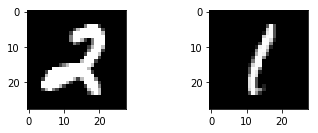

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [5]:
x_train=np.expand_dims(x_train, axis=3)
x_test=np.expand_dims(x_test, axis=3)

input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])
print("input_shape",input_shape)

# precise the pixel value to be 32 bit
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalize input from 0-255 to 0-1
x_train = x_train / 255.
x_test = x_test / 255.

print("normalize training data", x_train.shape)
print("normalize testing data", x_test.shape)
print("training labels", y_train.shape)
print("testing labels", y_test.shape)

input_shape (28, 28, 1)
normalize training data (42000, 28, 28, 1)
normalize testing data (28000, 28, 28, 1)
training labels (42000,)
testing labels (28000,)


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Conv2D(128, 3, strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn

from tensorflow.keras.optimizers import SGD, Adam

sgd = SGD(lr = 0.001, momentum = 0.0005, decay = 0.0005)

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.99, decay=0.0005)

In [8]:
model.compile(optimizer=adam,
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=200)


Train on 42000 samples, validate on 28000 samples
Epoch 1/50
42000/42000 [==============================] - 73s 2ms/sample - loss: 1.6116 - accuracy: 0.8565 - val_loss: 2.3277 - val_accuracy: 0.1130
Epoch 2/50
42000/42000 [==============================] - 68s 2ms/sample - loss: 1.5062 - accuracy: 0.9564 - val_loss: 1.5918 - val_accuracy: 0.8774
Epoch 3/50
42000/42000 [==============================] - 59s 1ms/sample - loss: 1.4960 - accuracy: 0.9660 - val_loss: 1.4902 - val_accuracy: 0.9719
Epoch 4/50
42000/42000 [==============================] - 55s 1ms/sample - loss: 1.4903 - accuracy: 0.9715 - val_loss: 1.4823 - val_accuracy: 0.9789
Epoch 5/50
42000/42000 [==============================] - 58s 1ms/sample - loss: 1.4864 - accuracy: 0.9754 - val_loss: 1.4809 - val_accuracy: 0.9802
Epoch 6/50
42000/42000 [==============================] - 60s 1ms/sample - loss: 1.4838 - accuracy: 0.9778 - val_loss: 1.4853 - val_accuracy: 0.9761
Epoch 7/50
42000/42000 [==============================] 

In [11]:
from keras.models import model_from_json
# save trained model
# serialize model to JSON
model_json = model.to_json()
with open("Q3_part2_mnist_trained_model_adam_50_epochs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5 and saving the weights
model.save_weights("Q3_part2_mnist_trained_model_adam_50_epochs.h5")
print("Saved model to disk")

Using TensorFlow backend.


Saved model to disk


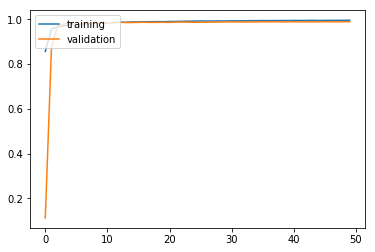

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [13]:
# Final evaluation of the model

scores = model.evaluate(x_test, y_test)

print("Accuracy : %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

28000/28000 [==============================] - 13s 453us/sample - loss: 1.4720 - accuracy: 0.9891
Accuracy : 98.91%
Baseline Error: 1.09%


In [14]:
import tensorflow as tf
y= model.predict(x_test)
print(y.shape)
y_pred = np.argmax(y, axis=1)
print(y_pred.shape)

con = tf.math.confusion_matrix(labels=y_test, predictions=y_pred )
print(con)

(28000, 10)
(28000,)
tf.Tensor(
[[2694    2    3    0    4    1   14    1    1    4]
 [   0 3140    5    2    1    0    2    7    2    0]
 [   3    2 2718   12    1    0    0   19    6    3]
 [   1    1   13 2808    0   10    0    8    1    2]
 [   3    3    2    0 2707    0    1    0    2   11]
 [   2    0    1    5    1 2500    6    1    4    0]
 [   4    1    1    0    4    3 2731    0    3    0]
 [   0    8   21    4    2    0    0 2944    0    5]
 [   4    0    2    4    7    4    7    0 2712   12]
 [   7    2    0    0    8    4    1    8    5 2742]], shape=(10, 10), dtype=int32)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
batch_normalization (BatchNo multiple                  128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  7